# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [ ]:
import torch

In [ ]:
torch.__version__

'1.6.0+cu101'

### 초기화 되지 않은 행렬 

In [ ]:
x = torch.empty(4, 2)
print(x)

tensor([[1.3636e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00],
        [       nan, 1.0746e+10],
        [1.1578e+27, 1.1362e+30]])


### 무작위로 초기화된 행렬

In [ ]:
x = torch.rand(4, 2)
print(x)

tensor([[0.2453, 0.2442],
        [0.1906, 0.4486],
        [0.2930, 0.1230],
        [0.7477, 0.5088]])


### dtype이 long, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [ ]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [ ]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x = torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[0.0142, 0.7364, 0.9854, 0.1673],
        [0.3791, 0.6228, 0.1301, 0.6997]])


### 텐서의 크기

In [ ]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [ ]:
print(x)

tensor([[0.0142, 0.7364, 0.9854, 0.1673],
        [0.3791, 0.6228, 0.1301, 0.6997]])


In [ ]:
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.9009, 0.6324, 0.6575, 0.0467],
        [0.6305, 0.1415, 0.6417, 0.7998]])
tensor([[0.9151, 1.3688, 1.6429, 0.2140],
        [1.0096, 0.7643, 0.7718, 1.4995]])


### 덧셈2

In [ ]:
print(torch.add(x, y))

tensor([[0.9151, 1.3688, 1.6429, 0.2140],
        [1.0096, 0.7643, 0.7718, 1.4995]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[0.9151, 1.3688, 1.6429, 0.2140],
        [1.0096, 0.7643, 0.7718, 1.4995]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.0142, 0.7364, 0.9854, 0.1673],
        [0.3791, 0.6228, 0.1301, 0.6997]])
tensor([[0.9009, 0.6324, 0.6575, 0.0467],
        [0.6305, 0.1415, 0.6417, 0.7998]])
tensor([[0.9151, 1.3688, 1.6429, 0.2140],
        [1.0096, 0.7643, 0.7718, 1.4995]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [ ]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(torch.mm(x, y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [ ]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [ ]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [ ]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x)
print(y)
print(z)

tensor([[ 0.0067, -1.0608, -1.3548, -2.3272,  0.8114],
        [ 0.9926,  1.2163,  0.2337, -0.5166,  1.0734],
        [-0.2683, -0.4863, -0.3025,  0.0754, -1.2326],
        [-2.1634,  1.7725,  0.3534,  0.0929, -0.6096]])
tensor([ 0.0067, -1.0608, -1.3548, -2.3272,  0.8114,  0.9926,  1.2163,  0.2337,
        -0.5166,  1.0734, -0.2683, -0.4863, -0.3025,  0.0754, -1.2326, -2.1634,
         1.7725,  0.3534,  0.0929, -0.6096])
tensor([[ 0.0067, -1.0608, -1.3548, -2.3272],
        [ 0.8114,  0.9926,  1.2163,  0.2337],
        [-0.5166,  1.0734, -0.2683, -0.4863],
        [-0.3025,  0.0754, -1.2326, -2.1634],
        [ 1.7725,  0.3534,  0.0929, -0.6096]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.6987])
-1.6987240314483643
torch.float32


- 스칼라값 하나만 존재해야함

In [ ]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([1.9501, 2.0644])


ValueError: ignored

### squeeze 
- 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.3187, 0.2723, 0.7815],
         [0.4111, 0.7426, 0.1615],
         [0.6865, 0.3226, 0.3631]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.3187, 0.2723, 0.7815],
        [0.4111, 0.7426, 0.1615],
        [0.6865, 0.3226, 0.3631]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [ ]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.5731, 0.4142, 0.2770],
         [0.7887, 0.4739, 0.7005],
         [0.4363, 0.8532, 0.9210]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.5731, 0.4142, 0.2770],
          [0.7887, 0.4739, 0.7005],
          [0.4363, 0.8532, 0.9210]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[[ 0.3246,  1.1999, -0.5908],
          [ 0.6608, -0.4917, -2.1463],
          [ 0.5757,  0.3304, -0.2031]]],


        [[[-0.0401,  0.4420,  0.5243],
          [ 1.9353,  0.2357, -0.2555],
          [ 0.8367,  0.4798,  1.7595]]]])
torch.Size([2, 1, 3, 3])


In [ ]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[ 0.5520,  0.9397, -0.2838],
         [ 0.7138, -1.3301,  1.2893],
         [ 1.4982, -0.7569,  0.2834]],

        [[-0.7265, -0.3488,  1.1855],
         [-0.9204, -1.4487,  0.4913],
         [-0.9945, -1.6298, -0.4453]]])
torch.Size([2, 3, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.1782, 0.6548, 0.9431, 0.2809, 0.6125, 0.5664],
        [0.4715, 0.8478, 0.4555, 0.5868, 0.2337, 0.3711],
        [0.3004, 0.4310, 0.9312, 0.3553, 0.1505, 0.9088]])
tensor([[0.1782, 0.6548],
        [0.4715, 0.8478],
        [0.3004, 0.4310]])
tensor([[0.9431, 0.2809],
        [0.4555, 0.5868],
        [0.9312, 0.3553]])
tensor([[0.6125, 0.5664],
        [0.2337, 0.3711],
        [0.1505, 0.9088]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.0818, 0.9381, 0.2640, 0.4832, 0.6811, 0.6134],
        [0.0970, 0.1508, 0.5246, 0.7639, 0.7271, 0.7347],
        [0.6673, 0.5607, 0.5400, 0.3355, 0.3171, 0.7981]])
tensor([[0.0818, 0.9381, 0.2640],
        [0.0970, 0.1508, 0.5246],
        [0.6673, 0.5607, 0.5400]])
tensor([[0.4832, 0.6811, 0.6134],
        [0.7639, 0.7271, 0.7347],
        [0.3355, 0.3171, 0.7981]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [ ]:
import torch

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.3304])
-0.33040547370910645
torch.float32


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([0.6696], device='cuda:0')
tensor([0.6696], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [ ]:
import torch

In [ ]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
print(y.grad_fn)

In [ ]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [ ]:
a = torch.randn(3, 3)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([-544.7933, -386.9782, 1860.1641], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
import torch

In [ ]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


- $b = a + 2$

In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [ ]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [ ]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [ ]:
print("b.data:", b.data)
print("b.grad:", b.grad)
print("b.grad_fn:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7f69028775c0>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [ ]:
print("c.data:", c.data)
print("c.grad:", c.grad)
print("c.grad_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7f690279b5c0>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [ ]:
print("out.data:", out.data)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7f6902877ba8>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [ ]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [ ]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [ ]:
print("x.data:", x.data)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [ ]:
print("y.data:", y.data)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7f69028617f0>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [ ]:
print("z.data:", z.data)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7f69028610b8>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [ ]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [ ]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

input = torch.randn(20, 16, 50, 100)
print(input)
output = m(input)
print(output)

tensor([[[[ 5.8307e-02, -3.4237e-01,  7.3275e-01,  ...,  2.9992e-01,
            1.3544e+00, -4.4687e-01],
          [ 1.5370e+00, -1.0001e+00,  1.0190e+00,  ...,  1.4767e-01,
            8.2530e-01, -1.4575e-01],
          [-4.8736e-02, -1.7604e-01, -1.0228e+00,  ...,  6.6236e-01,
           -2.7283e-02,  6.4363e-01],
          ...,
          [ 2.7431e-01, -1.2379e-01,  5.6770e-01,  ..., -4.9905e-01,
           -4.1330e-01, -7.7630e-01],
          [-7.8950e-01,  7.5536e-01, -1.0232e+00,  ...,  1.0944e+00,
            1.1531e+00, -1.2705e-01],
          [ 3.1827e-01, -3.4354e-01, -1.3805e-01,  ...,  7.8641e-01,
           -2.2724e-01,  3.6258e-02]],

         [[-2.3197e-01,  1.3392e+00,  2.9071e+00,  ...,  3.6212e-01,
           -9.4477e-01, -9.0417e-01],
          [-1.0731e+00,  1.6701e-01,  1.6757e+00,  ...,  2.3784e-02,
            2.2871e-01, -3.2345e-01],
          [-5.8198e-01, -1.5146e+00,  1.2350e+00,  ...,  1.2372e-01,
            1.2343e+00,  6.7680e-01],
          ...,
     

In [ ]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [ ]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [ ]:
filters = torch.randn(8, 4, 3, 3)

In [ ]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [ ]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform=transform)

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [ ]:
detaiter = iter(train_loader)
images, labels = detaiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [ ]:
image = torch_image.numpy()
image.shape

(28, 28)

In [ ]:
label = labels[0].numpy()
label.shape

()

In [ ]:
label

array(1)

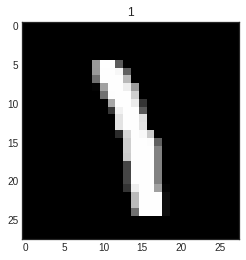

In [ ]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [ ]:
weight = weight.detach()

In [ ]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

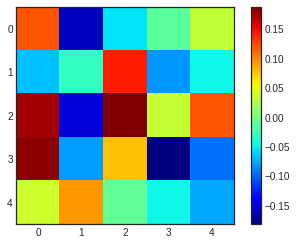

In [ ]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [ ]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [ ]:
input_image = torch.unsqueeze(images[0], dim=0)

In [ ]:
output_data = layer(input_image)

In [ ]:
output = output_data.data

In [ ]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

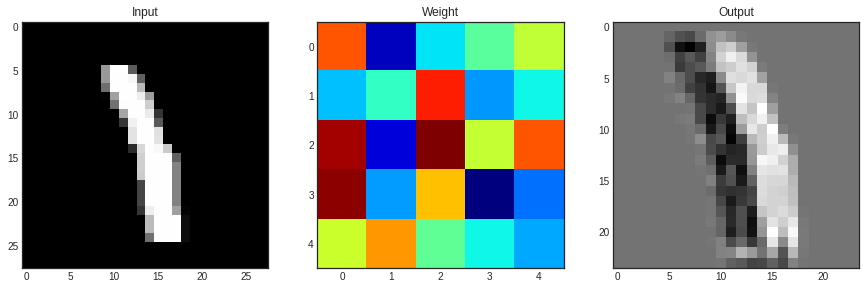

In [ ]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [ ]:
image.shape

(28, 28)

In [ ]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

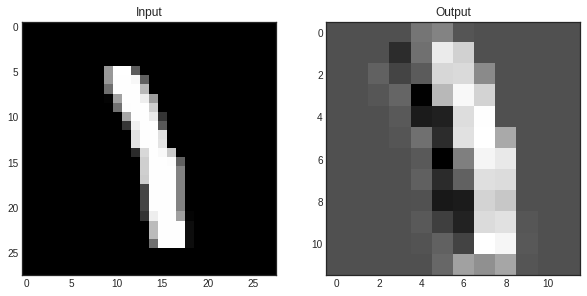

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [ ]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [ ]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [ ]:
lin

tensor([[ 0.6245,  0.3331,  0.3728, -0.0591,  0.3755, -0.4754,  0.4386,  0.3170,
         -0.0598, -0.8203]], grad_fn=<AddmmBackward>)

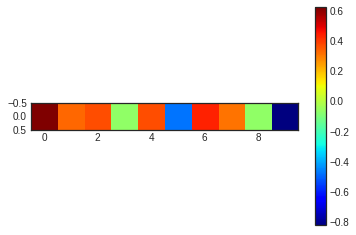

In [ ]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [ ]:
with torch.no_grad():
  flatten = image.view(1, 28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [ ]:
softmax

tensor([[0.1678, 0.0931, 0.0351, 0.1520, 0.1024, 0.0839, 0.1123, 0.0784, 0.0292,
         0.1459]])

In [ ]:
np.sum(softmax.numpy())

0.9999999

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [ ]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

